# Semantic Segmentation for Around View Monitoring System

## packages

In [1]:
import cv2, os
import time
import numpy as np
import matplotlib.pyplot as plt
from modules import sementic_segmentation

## initialization

In [2]:
# module initialization
model_path = './models/model_v1_0.pb'
ss = sementic_segmentation.avm_ss(model_path)

[avm_ss] model graphs are built


## inference

showing resolution: (160, 80)
end loop  0
end loop  1
end loop  2
end loop  3
end loop  4
end loop  5
end loop  6
end loop  7
end loop  8
end loop  9
end loop  10
end loop  11
end loop  12
end loop  13
end loop  14
end loop  15
end loop  16
end loop  17
end loop  18
end loop  19
end loop  20
end loop  21
end loop  22
end loop  23
end loop  24
end loop  25
end loop  26
end loop  27
end loop  28
end loop  29
end loop  30
end loop  31
end loop  32
end loop  33
end loop  34
end loop  35
end loop  36
end loop  37
end loop  38
end loop  39
end loop  40
end loop  41
end loop  42
end loop  43
end loop  44
end loop  45
end loop  46
end loop  47
end loop  48
end loop  49
before reformat [1.7742037773132324, 0.04899954795837402, 0.07999992370605469, 0.04600024223327637, 0.07299923896789551, 0.043520212173461914, 0.058001041412353516, 0.04299783706665039, 0.061002492904663086, 0.04399871826171875, 0.0729990005493164, 0.04300093650817871, 0.07399988174438477, 0.04399991035461426, 0.0559999942779541

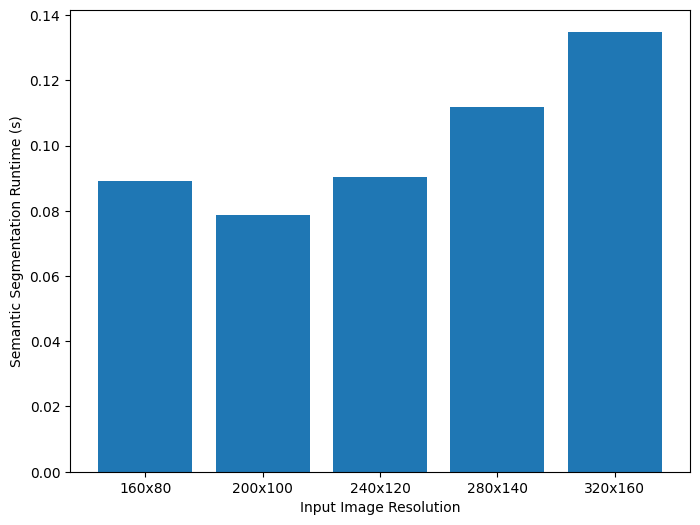

In [3]:
cap = cv2.VideoCapture(0)


resolutions = [
    (160, 80),
    (200, 100),
    (240, 120),
    (280, 140),
    (320, 160)  
]
fps_data = []
time_data = []
MAX_FRAMES = 50

for resolution in resolutions:
    print('showing resolution:', resolution)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, resolution[0])
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, resolution[1])
    
    total_time = time.time()
    start_time = time.time()
    frame_count = 0
    frame_num = 0
    
    while frame_num < MAX_FRAMES:
        time1 = time.time()
        ret, frame = cap.read()  # Read a frame from the webcam
    
        # Perform semantic segmentation inference on the frame
        resized_img = cv2.resize(frame, resolution)
        output = ss.run(resized_img) 
        frame_count += 1
        elapsed_time = time.time() - start_time
        time2 = time.time()
        time_data.append(time2 - time1)
        
        if elapsed_time > 1:
            #fps = frame_count / elapsed_time
            #fps_data.append(fps)
            #fps_text = f"FPS: {fps:.2f}"
            start_time = time.time()
            frame_count = 0
            #cv2.putText(output['img_overlay'], fps_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Break the loop if 10 seconds have passed
        if frame_num > MAX_FRAMES:
            break
        print("end loop ", frame_num)
        frame_num += 1
    
    #after while loop, consolidate time_data for last max_frames
    print("before reformat", time_data)
    time_data[-1 * MAX_FRAMES:] = [sum (time_data[-1 * MAX_FRAMES:]) / MAX_FRAMES]
    print("after reformat", time_data)

    
# Release the webcam and close windows
cap.release()
#cv2.destroyAllWindows()

#fps_data = np.array(fps_data) # Convert to numpy array
#fps_data = fps_data.reshape((3, -1)) # Reshape to (3, 8)
#fps_data = np.mean(fps_data, axis=1) # Take the mean along the second axis

resolution_labels = [f"{res[0]}x{res[1]}" for res in resolutions]
plt.figure(figsize=(8, 6))
plt.bar(resolution_labels, time_data)
plt.xlabel('Input Image Resolution')
plt.ylabel('Semantic Segmentation Runtime (s)')
plt.show()